# MACHINE LEARNING PROJECT: MOBILE PHONE PRICE PREDICTION

## 简介
在此项目中，我将尝试使用多种分类算法（`Naive Bayes`,`Logistic Regression`,`Linear Support Vector Machine`）来对一个小规模数据集进行监督学习，并比较不同的算法在测试集上进行分类的表现。该[数据集](https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=train.csv)是一个关于智能手机价格的数据集，它给出了一款手机的多个特征维度，并给出了该款手机所在的价格区间。我的模型尝试学习手机的这些特征维度与它最终的价格区间之间的联系，以达到给定一款手机的特征取值，模型将可以准确预测该手机所在的价格区间的效果。

## 数据集概览
数据集以csv文件的形式给出，我们可以使用Pandas来读取数据集，并简单观察数据集的特征。


In [1]:
import pandas as pd

df=pd.read_csv('price.csv')

In [2]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

可以看到每一条数据共21个维度，其中前20维为数据特征部分，包含一部手机的各方面特征的取值。第21维`price_range`指示该手机所在的价格区间，是模型的预测目标。根据各维度的名称，可以简要了解维度取值的含义：

* battery_power: 手机的电池容量（单位：mAh）
* blue: 是否支持蓝牙
* clock_speed: 手机处理器的时钟频率（GHz）
* dual_sim: 是否支持双卡
* fc: 手机前置摄像头像素（MP）
* four_g: 是否支持4G网络
* int_memory: 内置存储容量（GiB）
* m_dep: 意义暂不明
* mobile_wt: 手机重量（g）
* n_cores: 手机处理器核心数
* pc: 手机主摄像头像素（MP）
* px_height: 屏幕高度像素分辨率（像素）
* px_width: 屏幕宽度像素分辨率（像素）
* ram: 手机RAM容量（MiB）
* sc_h: 屏幕宽度（cm）
* sc_w: 屏幕高度（cm）
* talk_time: 单次充电的最长持续通话时间
* three_g: 是否支持3G网络
* touch_screen: 是否支持触摸屏
* wifi: 是否支持WiFi网络
* price_range: 手机的价格区间，数值越高表示价格越高，为预测目标

根据上述各维度的数据类型，可以看到该数据集中某些维度取值是连续的，如`battery_power`，某些维度取值是离散的，但仍具有数值含义，如`fc`，某些维度实际上是分类标记，不具有数值含义，如`blue`。对于前两类维度，模型可以直接进行预测，但对于第三类维度，我们理论上不能直接将其作为数值用于求梯度。然而，我们可以进一步检查这些维度：

In [4]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


可以看到这些维度取值均只有0,1，即它们是二分类标记，我们可以把它们作为数值计算；但一旦出现了多分类维度，即不可直接处理。

## 数据预处理
数据预处理部分主要包括以下任务：
* 切分数据集以便Cross Validation与评价模型的分类能力。我们把数据集按照8:1:1的比例划分为训练集、验证集（用于验证训练的效果）、测试集（用于最终评价模型的分类效果）
* 部分维度数据的极差过大，在计算梯度时可能导致梯度变化过大，难以收敛。我们对所有维度进行Normalization。
* 对于`Naive Bayes`算法，我们需要将连续数据离散化（discretization），以便计算模型的参数。

为了实现数据集分割需求，我们基于`sklearn.model_selection.train_test_split`辅助函数构造了以下类实现数据分割：

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
from pathlib import Path
from abc import ABC, abstractmethod
from typing import Tuple, Optional, Callable

PreprocessorType = Optional[Callable[[pd.DataFrame], pd.DataFrame]]


class AbstractDataSplitter(ABC):
    preprocessor: PreprocessorType

    def __init__(self, preprocessor: PreprocessorType = None):
        self.preprocessor = preprocessor

    @abstractmethod
    def load_source(self) -> pd.DataFrame:
        raise NotImplementedError('Concrete DataSplitter must implement load_source for data loading')

    def split(self, train_ratio: float, valid_ratio: float, test_ratio: float) -> Tuple[
        pd.DataFrame, pd.DataFrame, pd.DataFrame]:
        df = self.load_source()
        if self.preprocessor:
            df = self.preprocessor(df)
        total = train_ratio + valid_ratio + test_ratio
        first_round_part1, rest_total = train_ratio / total, total - train_ratio
        train_df, rest_df = train_test_split(df, train_size=first_round_part1)
        second_round_part1 = valid_ratio / rest_total
        valid_df, test_df = train_test_split(rest_df, train_size=second_round_part1)
        return train_df, valid_df, test_df


class FileDataSplitter(AbstractDataSplitter):
    source_filename: str
    train_filename: str
    valid_filename: str
    test_filename: str

    def __init__(self, source, train='train.csv', valid='valid.csv', test='test.csv',
                 preprocessor: PreprocessorType = None):
        super().__init__(preprocessor)
        self.source_filename = source
        self.train_filename = train
        self.valid_filename = valid
        self.test_filename = test

    def load_source(self) -> pd.DataFrame:
        return pd.read_csv(self.source_filename)

    def store(self, train: pd.DataFrame, valid: pd.DataFrame, test: pd.DataFrame):
        if self.source_filename in [self.train_filename, self.valid_filename, self.test_filename]:
            bak_filename = Path(f'{self.source_filename}.bak')
            if bak_filename.is_file():
                os.remove(str(bak_filename))
            os.rename(self.source_filename, f'{self.source_filename}.bak')
        train.to_csv(self.train_filename)
        valid.to_csv(self.valid_filename)
        test.to_csv(self.test_filename)

    def split(self, train_ratio: float, valid_ratio: float, test_ratio: float) -> Tuple[
        pd.DataFrame, pd.DataFrame, pd.DataFrame]:
        train_df, valid_df, test_df = super().split(train_ratio, valid_ratio, test_ratio)
        self.store(train_df, valid_df, test_df)
        return train_df, valid_df, test_df


class DataFrameSplitter(AbstractDataSplitter):
    source_df: pd.DataFrame

    def __init__(self, source_df: pd.DataFrame, preprocessor: PreprocessorType = None):
        super().__init__(preprocessor)
        self.source_df = source_df

    def load_source(self) -> pd.DataFrame:
        return self.source_df


`AbstractDataSplitter`为抽象类，定义了进行数据分割的通用接口和实现。在分割数据时，源数据的来源可能不同，但我们可以把它们统一读取为`pandas.DataFrame`形式，而后利用统一的`AbstractDataSplitter.split`方法进行分割。因此，具体的数据分割类只需实现`load_source`方法用于读取源数据为`DataFrame`形式即可。另外，我们常常需要在对源数据统一进行一定的预处理后再进行分割，因此`AbstractDataSplitter`提供`preprocessor`成员，在分割前，它将先调用该成员来处理源数据。

对于Normalization与Discretization，`sklearn`中均提供了相应的类，我们可以直接使用：

In [8]:
def normalization(self, data: pd.DataFrame) -> pd.DataFrame:
    scaler = MinMaxScaler()
    scaler.fit(data)
    self.scaler = scaler
    return pd.DataFrame(scaler.transform(data))

from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd
import numpy as np
from typing import Tuple


class Discretizer(KBinsDiscretizer):

    def __init__(self, n_bins=5):
        super().__init__(n_bins, encode='ordinal', strategy='uniform')

    def _new_stat_column(self):
        return [0 for _ in range(self.n_bins)]

    def transform_and_stat(self, x: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
        transformed: np.ndarray = super().transform(x)
        stat_data = {column: self._new_stat_column() for column in x.columns}
        for row in transformed:
            for bin_number, column_name in zip(row, x.columns):
                stat_data[column_name][bin_number] += 1

        return pd.DataFrame(transformed), pd.DataFrame(stat_data)

## 模型实现
本项目中，我分别实现了使用`Naive Bayes`,`Logistic Regression`与`Support Vector Machine`三种算法的分类模型；前两者使用了`sklearn`、`pandas`与`matplotlib`实现数据读取、存储、预处理以及分类结果展示功能，使用`numpy`加速计算；但核心的模型训练算法和分类过程均由我使用原生Python语言实现；SVM则主要使用`sklearn`提供的SVM类实现。

我们首先定义本项目中分类器的抽象接口类：


In [19]:
from abc import ABC, abstractmethod
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from typing import List, Dict, Optional, Tuple
from dataclasses import dataclass, field
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.svm import LinearSVC
from time import time


class AbstractClassifier(ABC):
    train_set: pd.DataFrame
    valid_set: pd.DataFrame
    test_set: pd.DataFrame
    train_labels: pd.Series
    valid_labels: pd.Series
    test_labels: pd.Series
    classes: List[int]
    name: str
    data_source: AbstractDataSplitter
    scaler: MinMaxScaler
    _prepared: False

    def __init__(self, name: str, data_source: AbstractDataSplitter):
        self.name = name
        self.data_source = data_source
        self.data_source.preprocessor = self.preprocessing

    def _prepared_hook(self):
        assert self._prepared

    @abstractmethod
    def labeling(self, data: pd.DataFrame) -> pd.Series:
        pass

    def normalization(self, data: pd.DataFrame) -> pd.DataFrame:
        scaler = MinMaxScaler()
        scaler.fit(data)
        self.scaler = scaler
        return pd.DataFrame(scaler.transform(data))

    @abstractmethod
    def preprocessing(self, data: pd.DataFrame) -> pd.DataFrame:
        pass

    @abstractmethod
    def prepare(self):
        pass

    @abstractmethod
    def train(self, *args, **kwargs):
        pass

    @abstractmethod
    def predicate(self, data_vector: pd.Series, *args, **kwargs) -> np.float64:
        pass

    @abstractmethod
    def test(self, *args, **kwargs):
        pass

    @abstractmethod
    def classify(self, to_classify: pd.DataFrame, *args, **kwargs):
        pass

    @abstractmethod
    def report(self):
        pass

一个分类器模型至少具有如下成员：
* train_set: pd.DataFrame
* valid_set: pd.DataFrame
* test_set: pd.DataFrame
* train_labels: pd.Series
* valid_labels: pd.Series
* test_labels: pd.Series
分别表示训练集、验证集、测试集以及相应集合中每一行数据的`label`。
* classes: List[int], 表示该分类器需要将数据分到的类别
* name: str，模型的名称
* data_source: AbstractDataSplitter，用于提供训练集、验证集与测试集
* scaler: MinMaxScaler，用于对数据集进行normalization，以及对训练完成后模型所需要分类的新数据执行normalization

该接口定义的抽象方法中，某些方法是模型特定，继承该接口的模型需要根据自身需求实现方法；某些方法为数据集特定，不同的数据集需要不同的实现。各抽象方法的语义如下：
* def labeling(self, data: pd.DataFrame) -> pd.Series: 数据集特定，接受源数据集，并为数据集添加名为`label`的列，其值为每行数据所属的类别，随后将所添加的列作为Series返回。若数据集已有此列，则可以直接返回相应列。
* def preprocessing(self, data: pd.DataFrame) -> pd.DataFrame: 模型特定。模型需要根据自身的需求实现。该方法用于预处理源数据，包括normalization与discretization等工作。`AbstractClassifier`的`__init__`方法会将本方法注册为`data_source`的`preprocessor`，以便在切分数据集前调用此方法执行预处理。
* def prepare(self): 执行模型的准备工作，包括读取数据、切分数据等。此方法应当初始化模型的`train_set, train_labels`等成员，并设置`_prepared`成员为True，以便其他方法检测数据是否已准备完成。
* def train(self, \*args, \*\*kwargs): 模型特定。使用train_set与train_labels中的数据训练模型，并在训练完成后保存模型的参数。由于不同模型在训练时可能需要提供不同的超参数，接口中并未定义任何实际命名的参数。
* def predicate(self, data_vector: pd.Series, \*args, \*\*kwargs) -> np.float64: 返回模型对于单行数据的预测值
* def classify(self, to_classify: pd.DataFrame, \*args, \*\*kwargs): 返回模型对于一个数据集的预测结果
* def test(self, \*args, \*\*kwargs): 在测试集上执行预测，返回预测结果
* def report(self): 执行`test`方法，随后根据测试结果计算各项指标，生成分类结果报告。

### Naive Bayes实现
`Naive Bayes`模型实现如下：

In [15]:
class AbstractNaiveBayesClassifier(AbstractClassifier, ABC):
    @dataclass
    class NaiveBayesParam:
        count: int = 0
        class_prob: np.float64 = 0.0
        features_prob: Optional[pd.DataFrame] = None

    params: Dict[int, NaiveBayesParam]
    discretizer: Discretizer

    def __init__(self, name: str, data_source: AbstractDataSplitter):
        super().__init__(name, data_source)
        self.params = {}
        self.discretizer = Discretizer(n_bins=10)

    def prepare(self):
        self.train_set, self.valid_set, self.test_set = self.data_source.split(0.8, 0.1, 0.1)
        self.train_set = pd.concat([self.train_set, self.valid_set])
        self.train_labels = self.train_set.pop('label')
        self.test_labels = self.test_set.pop('label')
        self._prepared = True

    def preprocessing(self, data: pd.DataFrame) -> pd.DataFrame:
        labels = self.labeling(data)
        normalized = self.normalization(data)
        ret = pd.DataFrame(self.discretizer.fit_transform(normalized))
        ret['label'] = labels
        return ret

    def train(self, *args, **kwargs):
        self._prepared_hook()
        feature_counters = {}
        for c in self.classes:
            self.params[c] = self.NaiveBayesParam()
            feature_counters[c] = {column_name: [0 for _ in range(self.discretizer.n_bins)] for column_name in
                                   self.train_set.columns}
        for (_, row), label in zip(self.train_set.iterrows(), self.train_labels):
            self.params[label].count += 1
            for bin_number, column_name in zip(row, self.train_set.columns):
                feature_counters[label][column_name][int(bin_number)] += 1

        total = self.train_set.shape[0]
        for c in self.classes:
            param = self.params[c]
            param.class_prob = param.count / total
            class_feature_params = feature_counters[c]
            for column_name in class_feature_params:
                class_feature_params[column_name] = list(
                    map(lambda x: x / param.count, class_feature_params[column_name]))
            param.features_prob = pd.DataFrame(class_feature_params)

    def predicate(self, data_vector: pd.Series, *args, **kwargs) -> Tuple[np.float64, int]:
        max_prob = np.float64(0.0)
        max_prob_class = -1
        discretized_vec = pd.Series(self.discretizer.transform(data_vector.values.reshape(1, -1))[0],
                                    index=data_vector.index)
        for c in self.classes:
            param = self.params[c]
            prob = np.float64(param.class_prob)
            features_prob = param.features_prob
            for column_name in features_prob.columns:
                prob *= features_prob[column_name][int(discretized_vec[column_name])]
            if prob > max_prob:
                max_prob = prob
                max_prob_class = c

        return max_prob, max_prob_class

    def test(self, *args, **kwargs) -> pd.Series:
        self._prepared_hook()
        return self.classify(self.test_set)

    def classify(self, to_classify: pd.DataFrame, *args, **kwargs) -> pd.Series:
        self._prepared_hook()
        return pd.Series(self.predicate(row) for _, row in to_classify.iterrows())

    def report(self):
        test_result = self.test()
        stat_counters = [
            [0, 0],
            [0, 0]
        ]
        for (_, predicate_label), test_label in zip(test_result, self.test_labels):
            stat_counters[predicate_label][test_label] += 1
        total = self.test_set.shape[0]
        tp = stat_counters[1][1]
        tn = stat_counters[0][0]
        fp = stat_counters[1][0]
        fn = stat_counters[0][1]
        acc = (tp + tn) / (tp + tn + fp + fn) * 100
        precision = tp / (tp + fp) * 100
        recall = tp / (tp + fn) * 100
        f1 = 2 / (1 / precision + 1 / recall)
        tpr = tp / total * 100
        tnr = tn / total * 100
        fpr = fp / total * 100
        fnr = fn / total * 100
        return pd.Series(
            {'Name': self.name, 'TP Rate': tpr, 'FP Rate': fpr, 'TN Rate': tnr, 'FN Rate': fnr, 'Accuracy': acc,
             'Precision': precision, 'Recall': recall, 'F1': f1})


class MobileDataSetMixin:
    def labeling(self, data: pd.DataFrame) -> pd.Series:
        labels = data['price_range'].apply(lambda x: 0 if x in [0, 1] else 1)
        self.classes = [0, 1]
        data.pop('price_range')
        return labels
    
class MobileNaiveBayes(MobileDataSetMixin, AbstractNaiveBayesClassifier):
    pass

我们首先定义`AbstractNaiveBayesClassifier`类，提供通用的`Naive Bayes`分类模型实现，后续其他模型也遵循该设计思路，下文不再赘述。模型参数使用`Dict[int, NaiveBayesParam]`结构存储，其键为模型的类，值为该类$C_i$所对应的参数，为使用`dataclass`定义的`NaiveBayesParam`对象，主要包括：
* count: 训练集中属于该类的数据点数目
* class_prob: 先验概率 $P(C_i)$
* features_prob: 似然，$P(x_i=j|C_i)$，每列表示特定维度$x_i$经离散化后各个取值的似然。

模型训练过程即是用样本中的各频率参数估计参数中相应的概率参数。

模型预测过程使用MAP预测，对于输入的数据点，分别计算其属于每一类的后验概率，随后取最大者作为预测类。

模型评价维度主要包括TPR、FPR、TNR、FNR、Accuracy、Precision、Recall、F1 Measure等数值。由于`Naive Bayes`算法中并不存在变化的超参数，因而无法绘出ROC曲线。模型`report`方法返回一个Series，包含上述各项数值。

### MobileDataSetMixin
`AbstractClassifier`中定义`labeling`方法为数据集特定方法，即使是相同的模型，也可能因为数据集的不同，而实现不同的`labeling`方法。对于本项目中使用的数据集，我们使用Mixin模式定义`MobileDataSetMixin`类，分类该数据集的模型可以将其加入自己的父类结构中，从而免去重复定义`labeling`方法。该Mixin根据每个数据点中`price_range`的值来生成`label`。当`price_range`为0或1时，表明手机价格较低，`label`为0；否则说明手机价格较高，`label`为1.这样将问题转化为二分类问题。

### Logistic Regression实现
`Logistic Regression`实现如下：

In [11]:
class AbstractGradientDescentModel(AbstractClassifier, ABC):
    params: np.ndarray
    learning_rate: float
    movement_rate: float

    @dataclass
    class TrainReport:
        batch_size: int
        epoch: int
        train_loss: List[float] = field(default_factory=lambda: [])
        valid_loss: List[float] = field(default_factory=lambda: [])

    train_report: TrainReport

    def __init__(self, name: str, learning_rate: float, data_source: AbstractDataSplitter, movement_rate: float = 0.1):
        super().__init__(name, data_source)
        self.learning_rate = learning_rate
        self.movement_rate = movement_rate

    @abstractmethod
    def gradient(self, data: pd.DataFrame, data_labels: pd.Series, cur_params: np.ndarray) -> np.ndarray:
        pass

    def descent(self, data: pd.DataFrame, data_labels: pd.Series, cur_params: np.ndarray,
                last_movement: np.float64) -> Tuple[np.ndarray, np.float64]:
        movement = -self.gradient(data, data_labels,
                                  cur_params) * self.learning_rate - self.movement_rate * last_movement
        return cur_params + movement, movement

    @abstractmethod
    def loss(self, data: pd.DataFrame, data_labels: pd.Series, cur_params: np.ndarray) -> np.float64:
        pass

    @abstractmethod
    def model(self, data_vector: pd.Series, params: np.ndarray) -> np.float64:
        pass

    def split_df(self, df: pd.DataFrame, batch_size: int):
        return np.array_split(df, int((df.shape[0] + batch_size - 1) / batch_size))

    def split_1d(self, ary, batch_size: int):
        return np.array_split(ary, int((len(ary) + batch_size - 1) / batch_size))

    def train(self, batch_size: int = 100, valid_loss_threshold: Optional[float] = None,
              max_epoch: Optional[int] = None,
              *args, **kwargs) -> TrainReport:
        threshold_enabled = valid_loss_threshold is not None
        epoch_enabled = max_epoch is not None
        assert threshold_enabled or epoch_enabled, 'You must specify one of ' \
                                                   'valid_loss_threshold and max_epoch at least '
        cur_params = self.params.copy()
        report = self.TrainReport(batch_size, 0)
        while True:
            report.epoch += 1
            epoch_train_loss = 0.0
            epoch_valid_loss = 0.0
            last_movement = np.float64(0.0)
            for batch, batch_label in zip(self.split_df(self.train_set, batch_size),
                                          self.split_1d(self.train_labels, batch_size)):
                cur_params, last_movement = self.descent(batch, batch_label, cur_params, last_movement)
                epoch_train_loss += self.loss(batch, batch_label, cur_params)
            for valid_batch, valid_batch_label in zip(self.split_df(self.valid_set, batch_size),
                                                      self.split_1d(self.valid_labels, batch_size)):
                epoch_valid_loss += self.loss(valid_batch, valid_batch_label, cur_params)
            epoch_train_loss = epoch_train_loss / self.train_set.shape[0]
            epoch_valid_loss = epoch_valid_loss / self.valid_set.shape[0]
            report.train_loss.append(epoch_train_loss)
            report.valid_loss.append(epoch_valid_loss)
            print(f'Epoch: {report.epoch},Train Loss: {epoch_train_loss:.2f},Valid loss: {epoch_valid_loss:.2f}')
            if threshold_enabled and epoch_valid_loss <= valid_loss_threshold:
                self.train_report = report
                self.params = cur_params
                return report
            if epoch_enabled and report.epoch == max_epoch:
                self.train_report = report
                self.params = cur_params
                return report

    def preprocessing(self, data: pd.DataFrame) -> pd.DataFrame:
        labels = self.labeling(data)
        normalized = self.normalization(data)
        normalized['label'] = labels
        normalized.insert(len(normalized.columns), len(normalized.columns) - 1, 1)
        return normalized

    def prepare(self):
        self.train_set, self.valid_set, self.test_set = self.data_source.split(0.8, 0.1, 0.1)
        self.train_labels = self.train_set.pop('label')
        self.valid_labels = self.valid_set.pop('label')
        self.test_labels = self.test_set.pop('label')
        self.params = np.random.randn(len(self.train_set.columns))
        self._prepared = True

    def predicate(self, data_vector: pd.Series, threshold: float = 0.5, *args, **kwargs) -> Tuple[np.float64, int]:
        prob = self.model(data_vector, self.params)
        return prob, 1 if prob >= threshold else 0

    def test(self, threshold: float = 0.5, *args, **kwargs) -> pd.Series:
        return self.classify(self.test_set)

    def classify(self, to_classify: pd.DataFrame, threshold: float = 0.5, *args, **kwargs) -> pd.Series:
        return pd.Series(self.predicate(row, threshold) for _, row in to_classify.iterrows())

    def report(self):
        test_result = [prob for prob, _ in self.test()]
        fpr, tpr, threshold = roc_curve(self.test_labels, test_result)
        auc = roc_auc_score(self.test_labels, test_result)
        plt.figure()
        plt.subplot(211)
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label=f'ROC curve (area = {auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC of {self.name}')
        plt.legend(loc="lower right")

        plt.subplot(212)
        epoch = np.arange(1, self.train_report.epoch + 1)
        plt.plot(epoch, self.train_report.train_loss, color='darkorange',
                 lw=lw, label='Loss on train set')
        plt.plot(epoch, self.train_report.valid_loss, color='navy',
                 lw=lw, label='Loss on valid set')
        plt.xlim([0.0, self.train_report.epoch + 1])
        plt.xlabel('Epoch')
        plt.ylabel('Cross Entropy Loss')
        plt.title(f'Loss curve of {self.name}')
        plt.legend(loc="lower right")
        plt.show()


class MobileLogisticRegression(MobileDataSetMixin, AbstractGradientDescentModel):
    def gradient(self, data: pd.DataFrame, data_labels: pd.Series, cur_params: np.ndarray) -> np.ndarray:
        grad_sum = sum(
            np.dot(X.T, self.logit(X, cur_params) - y) for (_, X), y in zip(data.iterrows(), data_labels))
        return grad_sum

    def loss(self, data: pd.DataFrame, data_labels: pd.Series, cur_params: np.ndarray) -> float:
        loss_sum = np.float64(0.0)
        for (_, X), y in zip(data.iterrows(), data_labels):
            logit = self.logit(X, cur_params)
            loss_sum += -y * np.log(logit) - (1 - y) * np.log(1 - logit)
        return loss_sum

    def model(self, data_vector: pd.Series, params: np.ndarray) -> np.float64:
        return self.logit(data_vector, params)

    def logit(self, data_vector: pd.Series, params: np.ndarray) -> np.float64:
        return 1 / (1 + np.exp(-np.dot(data_vector.values.T, params)))


由于有许多模型均使用`Gradient Descent`进行参数优化，我们首先定义`AbstractGradientDescentModel`类来实现参数优化的通用逻辑。模型参数使用`np.ndarray`定义，为一维参数向量。该类的`train`方法使用`train_set`不断优化参数向量，并在每一轮训练结束后，使用优化后的参数在`valid_set`上验证训练结果。它接受三个额外的超参数：
* batch_size: 每次descent过程的batch大小，可用于执行mini-batch训练
* valid_loss_threshold: 每轮训练后在`valid_set`上的总误差目标值，若某轮训练后的模型在`valid_set`上的误差小于等于该值，则认为模型已经充分优化，终止训练
* max_epoch: 最大训练轮次。训练时至少要定义两参数中的一个，以指定训练终止条件。两个条件满足任一者即停止训练。

在训练过程中，我们对模型损失函数的值的变化很感兴趣。我们定义`TrainReport`类，用于存储训练过程相关的数据。`train`方法会记录训练过程中的轮次、`batch_size`以及在训练集与测试集上的损失随轮次的变化等信息，以供`report`方法使用。

`descent`方法实现每次迭代时的参数优化过程，返回优化后的参数。我们的`descent`实现引入了`Momentum`的影响，因此需要两个超参数，即`learning_rate`与`movement_rate`。优化过程如下：
$$
v^t=-\lambda v^{t-1}-\eta \frac{\partial L(\theta^t)}{\partial \theta} \\
\theta^{t+1}=\theta^t+v^t
$$

由于模型输出的是模型对于给定数据为正例的预测值，因此需要一个阈值来划定正例与负例，此为超参数。因此，`report`方法将首先在测试集上执行预测，随后使用测试结果，绘制模型的ROC曲线并计算AUC；此外，还将使用训练过程中产生的`TrainReport`来绘制训练过程中训练集与测试集上的损失变化图。

继承`AbstractGradientDescentModel`的模型需要实现几个模型特定的抽象方法：
* def gradient(self, data: pd.DataFrame, data_labels: pd.Series, cur_params: np.ndarray) -> np.ndarray: 给定batch数据和当前参数，计算当前参数点处的梯度向量
* def loss(self, data: pd.DataFrame, data_labels: pd.Series, cur_params: np.ndarray) -> np.float64: 给定数据集和当前参数，计算模型在当前参数下对给定数据集的损失
* def model(self, data_vector: pd.Series, params: np.ndarray) -> np.float64: 给定数据点和当前参数，计算模型对于该数据点的预测值。模型的`predicate`方法使用该方法来预测单个点的分类。

`MobileLogisticRegression`实现了在本项目所使用的数据集上的`Logistic Regression`算法。主要是根据`Logistic Regression`算法的要求实现了上述的几个抽象方法。

### Support Vector Machine
我们基于`sklearn.svm.LinearSVC`实现了SVM分类模型。

In [21]:
class AbstractSVMClassifier(AbstractClassifier, ABC):
    svm: LinearSVC

    def __init__(self, name: str, data_source: AbstractDataSplitter):
        super().__init__(name, data_source)
        self.svm = LinearSVC()

    def preprocessing(self, data: pd.DataFrame) -> pd.DataFrame:
        labels = self.labeling(data)
        normalized = self.normalization(data)
        normalized['label'] = labels
        normalized.insert(len(normalized.columns), len(normalized.columns) - 1, 1)
        return normalized

    def prepare(self):
        self.train_set, self.valid_set, self.test_set = self.data_source.split(0.8, 0.1, 0.1)
        self.train_set = pd.concat([self.train_set, self.valid_set])
        self.train_labels = self.train_set.pop('label')
        self.test_labels = self.test_set.pop('label')
        self._prepared = True

    def train(self, *args, **kwargs):
        self.svm.fit(self.train_set, self.train_labels)

    def predicate(self, data_vector: pd.Series, *args, **kwargs) -> np.float64:
        pass

    def test(self, *args, **kwargs):
        return self.classify(self.test_set)

    def classify(self, to_classify: pd.DataFrame, *args, **kwargs):
        return self.svm.predict(to_classify)

    def report(self):
        plot_roc_curve(self.svm, self.test_set, self.test_labels)
        plt.show()


class MobileSVM(MobileDataSetMixin, AbstractSVMClassifier):
    pass

`AbstractSVMClassifier`底层使用`LinearSVC`类进行训练与分类，自身主要实现了数据预处理与准备方法。

## 模型测试
在实现上述三种模型后，我们使用所实现的模型在给定数据集上分别进行训练和预测。

In [20]:
def timeit(func,*args,**kwargs):
    start=time()
    func(*args,**kwargs)
    end=time()
    return end-start

ds=FileDataSplitter(source='price.csv')
nb=MobileNaiveBayes('price_nb', ds)
nb.prepare()
nb_train_time=timeit(nb.train)
nb_test_time=timeit(nb.test)
nb.report()

Name         price_nb
TP Rate            44
FP Rate          41.5
TN Rate          14.5
FN Rate             0
Accuracy         58.5
Precision      51.462
Recall            100
F1            67.9537
dtype: object

以上数值单位为\%。

Epoch: 1,Train Loss: 1.89,Valid loss: 2.06
Epoch: 2,Train Loss: 1.23,Valid loss: 1.35
Epoch: 3,Train Loss: 0.54,Valid loss: 0.51
Epoch: 4,Train Loss: 0.28,Valid loss: 0.29
Epoch: 5,Train Loss: 0.20,Valid loss: 0.27
Epoch: 6,Train Loss: 0.19,Valid loss: 0.26
Epoch: 7,Train Loss: 0.18,Valid loss: 0.25
Epoch: 8,Train Loss: 0.17,Valid loss: 0.23
Epoch: 9,Train Loss: 0.16,Valid loss: 0.22
Epoch: 10,Train Loss: 0.16,Valid loss: 0.21
Epoch: 11,Train Loss: 0.15,Valid loss: 0.20
Epoch: 12,Train Loss: 0.15,Valid loss: 0.20
Epoch: 13,Train Loss: 0.14,Valid loss: 0.19
Epoch: 14,Train Loss: 0.14,Valid loss: 0.18
Epoch: 15,Train Loss: 0.14,Valid loss: 0.18
Epoch: 16,Train Loss: 0.13,Valid loss: 0.17
Epoch: 17,Train Loss: 0.13,Valid loss: 0.17
Epoch: 18,Train Loss: 0.13,Valid loss: 0.16
Epoch: 19,Train Loss: 0.12,Valid loss: 0.16
Epoch: 20,Train Loss: 0.12,Valid loss: 0.16
Epoch: 21,Train Loss: 0.12,Valid loss: 0.15
Epoch: 22,Train Loss: 0.12,Valid loss: 0.15
Epoch: 23,Train Loss: 0.12,Valid loss: 0.

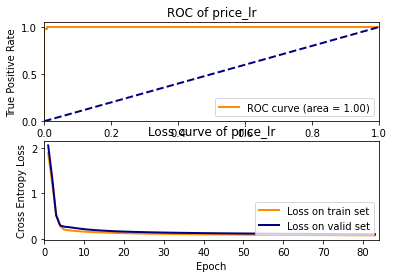

In [22]:
lr = MobileLogisticRegression('price_lr', 0.03, ds)
lr.prepare()
lr_train_time=timeit(lr.train,valid_loss_threshold=0.1)
lr_test_time=timeit(lr.test)
lr.report()

Epoch: 1,Train Loss: 1.74,Valid loss: 2.42
Epoch: 2,Train Loss: 1.28,Valid loss: 1.50
Epoch: 3,Train Loss: 0.50,Valid loss: 0.23
Epoch: 4,Train Loss: 0.31,Valid loss: 0.26
Epoch: 5,Train Loss: 0.25,Valid loss: 0.20
Epoch: 6,Train Loss: 0.21,Valid loss: 0.18
Epoch: 7,Train Loss: 0.20,Valid loss: 0.18
Epoch: 8,Train Loss: 0.18,Valid loss: 0.17
Epoch: 9,Train Loss: 0.18,Valid loss: 0.17
Epoch: 10,Train Loss: 0.17,Valid loss: 0.16


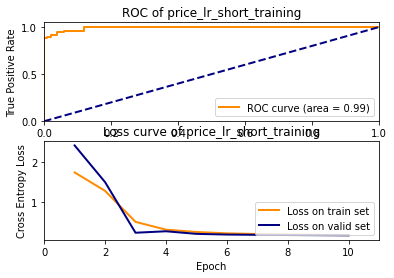

In [32]:
lr_short = MobileLogisticRegression('price_lr_short_training', 0.03, ds)
lr_short.prepare()
lr_short_train_time=timeit(lr_short.train,max_epoch=10)
lr_short_test_time=timeit(lr_short.test)
lr_short.report()

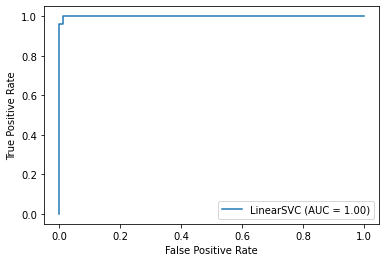

In [23]:
svm = MobileSVM('price_svm', ds)
svm.prepare()
svm_train_time=timeit(svm.train)
svm_test_time=timeit(svm.test)
svm.report()

## 结果分析
我们一共进行了四轮训练与测试。第一轮测试`Naive Bayes`模型的效果，第二、三轮测试`Logistic Regression`模型的效果，第四轮测试`SVM`模型的效果。

从测试结果来看，`Naive Bayes`模型的准确率（Accuracy）很不理想，多次测试显示其准确率均在60%上下浮动，且受数据集分割的影响很严重。这是因为该模型假设输入数据点的每个维度之间都是不相关的，这一假设过于理想，例如，`price_range`较高的手机，其各项数值通常都同步提升；此外，该模型直接使用训练集的频率代替模型中的概率参数，这对于规模较小的数据集很容易过拟合，受数据集分割情况的影响很大。但其优点可能在于实现相对简单。

`Logistic Regression`模型的参数优化过程使用梯度下降算法，导致其训练时间相对较长，但训练完成后模型的表现很好。从ROC曲线可以看到，其对测试集的分配效果接近理想分类器。从第二轮训练的损失变化曲线可以看到，只需较少的训练轮次即可使损失下降到较低的水准，而后续的数十趟优化对损失的优化程度并不大。因此我们执行了第三轮训练（`Logistic Regression(Short Training)`），将训练轮数限制在最大10轮。从该次训练的ROC曲线来看，其分类效果依旧接近理想分类器，但训练所需时间大大降低。

`SVM`模型对于线性可分的二分类数据集有极强的分类效果。从ROC曲线可以看到它的结果也基本等同于理想分类器，且性能表现极佳。

各模型的训练与测试时间如下表所示。

In [33]:
index=['Training time(s)','Testing time(s)']
res_table=pd.DataFrame({
    'Naive Bayes': pd.Series([nb_train_time,nb_test_time],index=index),
    'Logistic Regression': pd.Series([lr_train_time, lr_test_time],index=index),
    'Logistic Regression (Short Training)': pd.Series([lr_short_train_time, lr_short_test_time],index=index),
    'SVM': pd.Series([svm_train_time,svm_test_time],index=index)
})
res_table

,Naive Bayes,Logistic Regression,Logistic Regression (Short Training),SVM
Training time(s),0.105025,22.654828,2.460948,0.012007
Testing time(s),0.307520,0.012005,0.014006,0.002017


`Logistic Regression`模型使用梯度下降算法，计算量大，因此训练时间在三种模型中最长。`Naive Bayes`模型的训练过程很简单，但由于计算基本在Python运行时中完成，所以效率仍逊于`SVM`。由于`SVM`模型使用了`sklearn`包中经过高度优化的实现，且该实现使用C扩展完成计算，而非使用Python，故其性能表现极佳。

在测试时间方面，`Naive Bayes`的计算量最大，因其需要枚举测试数据点对于每一类的后验，且计算大多使用Python完成，因而测试时间最长。`Logistic Regression`在测试时计算主要使用`numpy`，但其计算过程需要执行浮点数指数、除法等运算，耗时相对较长；而`SVM`在预测时只需要计算数据点与支持向量的内积，故速度最快。

在三种模型中，`SVM`的综合表现最佳。